In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
path =r'D:\Dataset\Tap4fun'
os.listdir(path)

['mackenyu3844.zip',
 'sub_sample.csv',
 'tap4fun 数据字段解释.xlsx',
 'tap_fun_test.csv',
 'tap_fun_train.csv']

In [3]:
train_data = pd.read_csv(os.path.join(path, 'tap_fun_train.csv'))

In [4]:
train_data.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,1,2018-02-02 19:47:15,20125.0,3700.0,0.0,0.0,0.0,0.0,16375.0,2000.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
1,1593,2018-01-26 00:01:05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
2,1594,2018-01-26 00:01:58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1.166667,0.0,0,0.0
3,1595,2018-01-26 00:02:13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,3.166667,0.0,0,0.0
4,1596,2018-01-26 00:02:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,2.333333,0.0,0,0.0


In [5]:
train_data.columns

Index(['user_id', 'register_time', 'wood_add_value', 'wood_reduce_value',
       'stone_add_value', 'stone_reduce_value', 'ivory_add_value',
       'ivory_reduce_value', 'meat_add_value', 'meat_reduce_value',
       ...
       'pvp_battle_count', 'pvp_lanch_count', 'pvp_win_count',
       'pve_battle_count', 'pve_lanch_count', 'pve_win_count',
       'avg_online_minutes', 'pay_price', 'pay_count', 'prediction_pay_price'],
      dtype='object', length=109)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2288007 entries, 0 to 2288006
Columns: 109 entries, user_id to prediction_pay_price
dtypes: float64(13), int64(95), object(1)
memory usage: 1.9+ GB


In [7]:
train_data.select_dtypes(include='object').head()

,register_time
0,2018-02-02 19:47:15
1,2018-01-26 00:01:05
2,2018-01-26 00:01:58
3,2018-01-26 00:02:13
4,2018-01-26 00:02:46


In [8]:
train_data['register_time'] = pd.to_datetime(train_data['register_time'])

In [9]:
float_feat = train_data.select_dtypes(include='float64').columns.values
int_feat = train_data.select_dtypes(include='int64').columns.values
train_data[float_feat] = train_data[float_feat].astype(np.float32)
train_data[int_feat] = train_data[int_feat].astype(np.int32)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2288007 entries, 0 to 2288006
Columns: 109 entries, user_id to prediction_pay_price
dtypes: datetime64[ns](1), float32(13), int32(95)
memory usage: 960.1 MB


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2288007 entries, 0 to 2288006
Columns: 109 entries, user_id to prediction_pay_price
dtypes: datetime64[ns](1), float32(13), int32(95)
memory usage: 960.1 MB


In [11]:
train_data.describe()

,user_id,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,magic_add_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
count,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,...,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06
mean,1.529543e+06,4.531766e+05,3.691487e+05,1.897267e+05,1.376062e+05,8.056148e+04,3.613148e+04,5.836586e+05,3.538120e+05,7.537811e+04,...,2.148313e+00,1.059639e+00,9.838589e-01,2.844738e+00,2.832409e+00,2.556749e+00,1.016729e+01,5.347958e-01,5.770699e-02,1.793456e+00
std,9.399393e+05,4.945190e+06,3.725140e+06,4.666598e+06,3.367308e+06,2.218982e+06,1.782125e+06,5.850014e+06,3.387769e+06,9.638427e+05,...,1.167797e+01,9.074459e+00,8.951280e+00,1.276245e+01,1.271820e+01,1.184737e+01,3.869698e+01,2.263181e+01,7.090886e-01,8.844339e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.499925e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.419095e+06,4.203800e+04,9.830000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.458700e+04,6.470000e+03,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.833333e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.299006e+06,1.531180e+05,9.855700e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.360010e+05,6.605400e+04,0.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.833333e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.190530e+06,1.239962e+09,7.995875e+08,1.214869e+09,7.962378e+08,5.744961e+08,4.481972e+08,1.470644e+09,8.889537e+08,2.637228e+08,...,2.054000e+03,2.051000e+03,1.904000e+03,5.090000e+02,5.090000e+02,4.880000e+02,2.049667e+03,7.457950e+03,1.050000e+02,3.297781e+04


统计重复数值

In [12]:
train_data[train_data['user_id'].duplicated()].count()

user_id                               0
register_time                         0
wood_add_value                        0
wood_reduce_value                     0
stone_add_value                       0
stone_reduce_value                    0
ivory_add_value                       0
ivory_reduce_value                    0
meat_add_value                        0
meat_reduce_value                     0
magic_add_value                       0
magic_reduce_value                    0
infantry_add_value                    0
infantry_reduce_value                 0
cavalry_add_value                     0
cavalry_reduce_value                  0
shaman_add_value                      0
shaman_reduce_value                   0
wound_infantry_add_value              0
wound_infantry_reduce_value           0
wound_cavalry_add_value               0
wound_cavalry_reduce_value            0
wound_shaman_add_value                0
wound_shaman_reduce_value             0
general_acceleration_add_value        0


原数据中无重复数据

In [13]:
train_data['pay_price'].describe()

count    2.288007e+06
mean     5.347958e-01
std      2.263181e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.457950e+03
Name: pay_price, dtype: float64

人均付费金额为0.5346691元，最大付费金额为7457.95元

In [14]:
train_data[train_data['pay_price'] > 0]['pay_price'].describe()

count    41439.000000
mean        29.528141
std        165.658875
min          0.990000
25%          0.990000
50%          1.990000
75%         11.970000
max       7457.950195
Name: pay_price, dtype: float64

付费玩家中人均消费金额为29.5元，最小付费金额为0.99元，最大付费金额为7457.95元

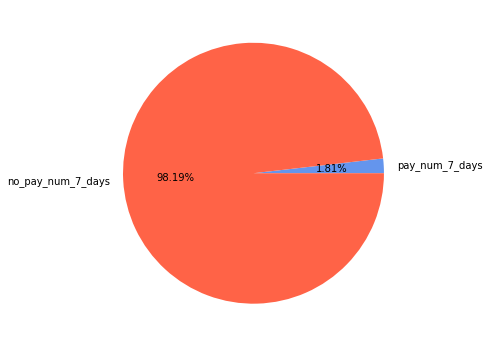

In [57]:
pay_count = [train_data[train_data['pay_price'] > 0]['pay_price'].count(), train_data[train_data['pay_price'] == 0]['pay_price'].count()]
fig = plt.figure(figsize=(6, 6))
plt.pie(pay_count, labels=['pay_num_7_days', 'no_pay_num_7_days'], autopct='%1.2f%%',  \
        colors=['cornflowerblue', 'tomato'])
plt.savefig('7_days_pay_pct.png', dpi=100)

In [16]:
train_data['pay_count'].describe()

count    2.288007e+06
mean     5.770699e-02
std      7.090886e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.050000e+02
Name: pay_count, dtype: float64

所有玩家的平均付费次数为0.057次，最大付费次数为105次

In [17]:
train_data['user_id'].duplicated().any()

False

In [18]:
train_data['prediction_pay_price'].describe()

count    2.288007e+06
mean     1.793456e+00
std      8.844339e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.297781e+04
Name: prediction_pay_price, dtype: float64

45天内预测人均消费金额为1.79元，最大消费金额为32977元

In [19]:
train_data[train_data['prediction_pay_price'] > 0]['prediction_pay_price'].describe()

count    45988.000000
mean        89.228508
std        617.739014
min          0.990000
25%          0.990000
50%          3.970000
75%         20.980000
max      32977.808594
Name: prediction_pay_price, dtype: float64

45天内预测的有消费玩家中，人均消费金额为89.213元，最大消费金额为32977.8元

In [20]:
pay_num_45_days = train_data[train_data['prediction_pay_price'] > 0]['prediction_pay_price'].count()
pay_num_45_days

45988

In [21]:
no_pay_num_45_days = train_data[train_data['prediction_pay_price'] == 0]['prediction_pay_price'].count()
no_pay_num_45_days

2242019

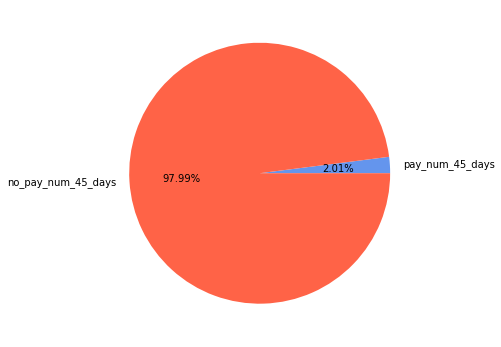

In [56]:
fig = plt.figure(figsize=(6, 6))
plt.pie([pay_num_45_days, no_pay_num_45_days],labels=['pay_num_45_days', 'no_pay_num_45_days'], autopct='%1.2f%%', \
        colors=['cornflowerblue', 'tomato'])
plt.savefig('45_days_pay_pct.png', dpi=100)

In [23]:
temp_data = train_data.sample(100000)

In [24]:
temp_data.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
1876930,2694512,2018-02-24 15:35:25,880238.0,863378.0,0.0,0.0,0.0,0.0,1561058.0,965341.0,...,0,0,0,0,0,0,10.833333,0.0,0,0.0
1867500,2685082,2018-02-18 00:14:41,6625.0,0.0,0.0,0.0,0.0,0.0,3375.0,0.0,...,0,0,0,0,0,0,1.166667,0.0,0,0.0
5200,6792,2018-01-29 06:55:55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,4.666667,0.0,0,0.0
762036,943844,2018-02-26 04:44:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1.500000,0.0,0,0.0
2183420,3049259,2018-02-20 00:23:26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.500000,0.0,0,0.0


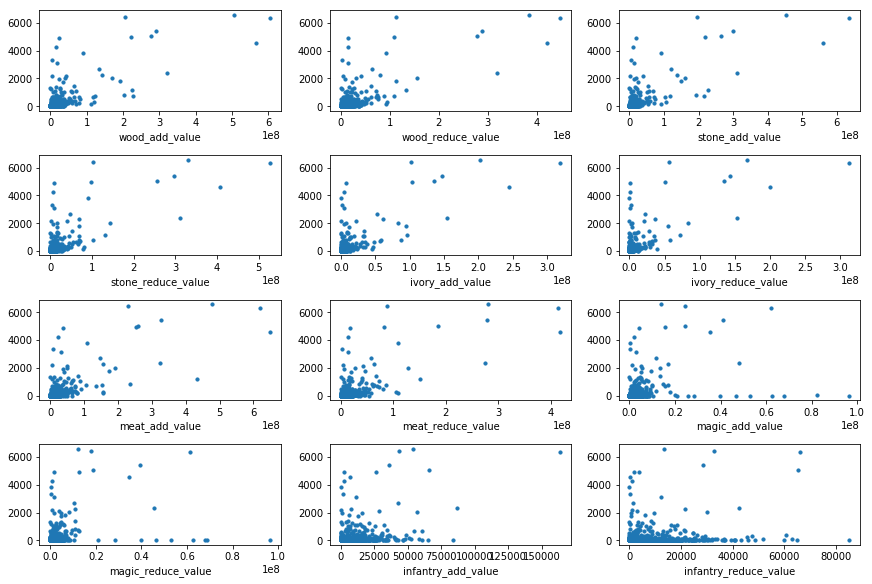

In [30]:
fig, axs = plt.subplots(4, 3, constrained_layout=True, figsize=(12, 8))
n = 2
for i in range(4):
    for j in range(3):
        axs[i, j].scatter(temp_data.iloc[ : , n], temp_data.iloc[ : , -1], s=10)
        axs[i, j].set_xlabel(temp_data.iloc[ : , n].name)
        n += 1
plt.savefig('scatter.png', dpi=100)

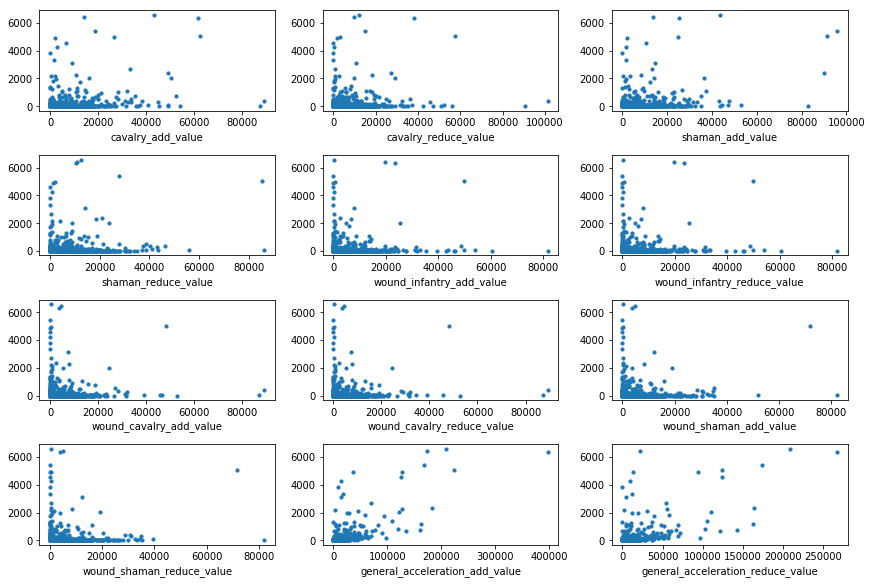

In [29]:
fig, axs = plt.subplots(4, 3, constrained_layout=True, figsize=(12, 8))
n = 14
for i in range(4):
    for j in range(3):
        axs[i, j].scatter(temp_data.iloc[ : , n], temp_data.iloc[ : , -1], s=10)
        axs[i, j].set_xlabel(temp_data.iloc[ : , n].name)
        n += 1
plt.savefig('scatter2.png', dpi=100)

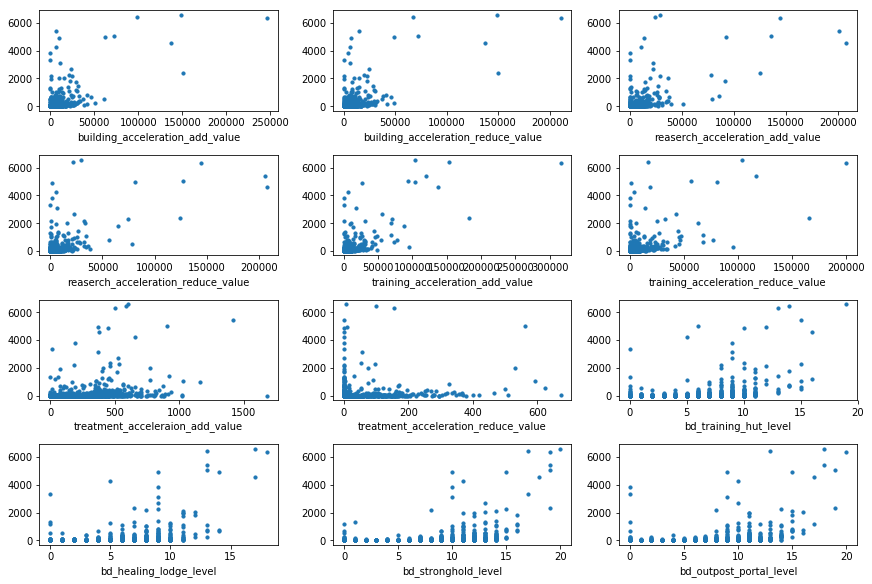

In [31]:
fig, axs = plt.subplots(4, 3, constrained_layout=True, figsize=(12, 8))
n = 26
for i in range(4):
    for j in range(3):
        axs[i, j].scatter(temp_data.iloc[ : , n], temp_data.iloc[ : , -1], s=10)
        axs[i, j].set_xlabel(temp_data.iloc[ : , n].name)
        n += 1
plt.savefig('scatter3.png', dpi=100)

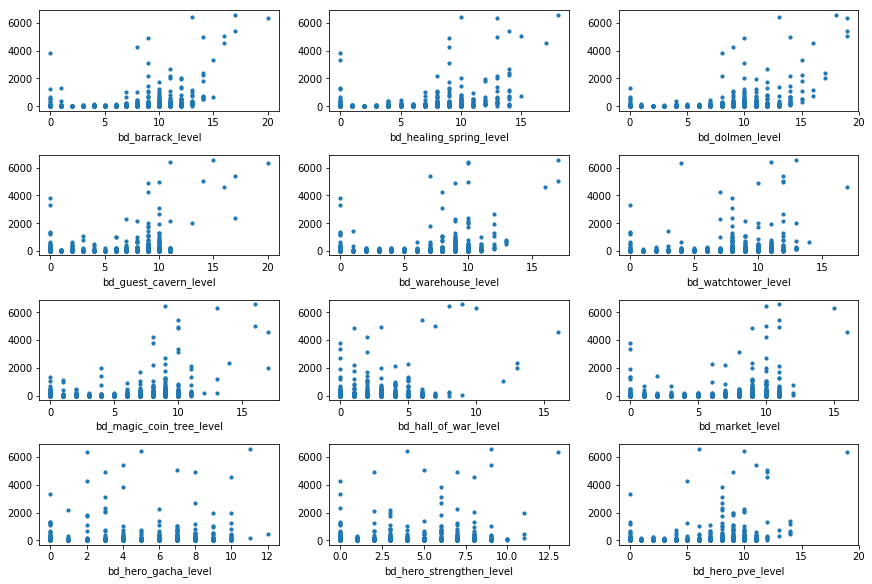

In [32]:
fig, axs = plt.subplots(4, 3, constrained_layout=True, figsize=(12, 8))
n = 38
for i in range(4):
    for j in range(3):
        axs[i, j].scatter(temp_data.iloc[ : , n], temp_data.iloc[ : , -1], s=10)
        axs[i, j].set_xlabel(temp_data.iloc[ : , n].name)
        n += 1
plt.savefig('scatter4.png', dpi=100)

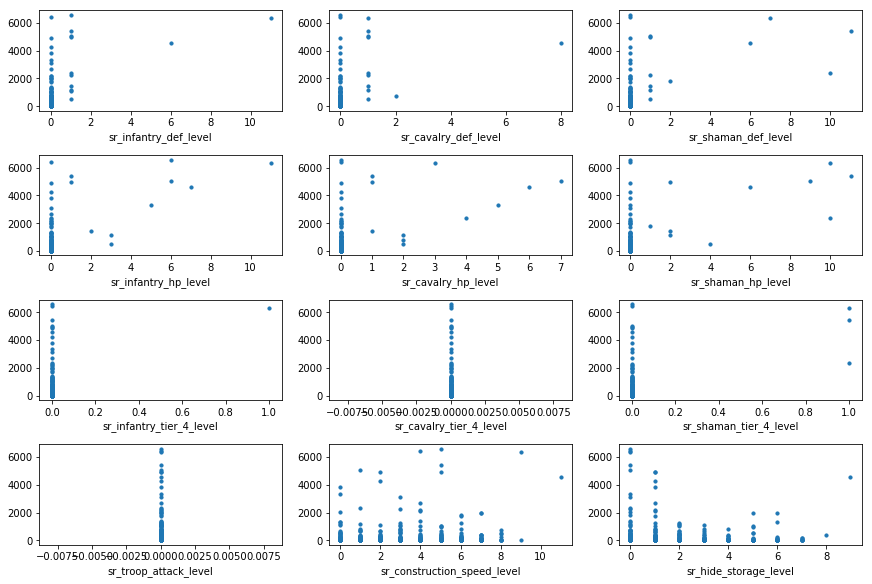

In [33]:
fig, axs = plt.subplots(4, 3, constrained_layout=True, figsize=(12, 8))
n = 50
for i in range(4):
    for j in range(3):
        axs[i, j].scatter(temp_data.iloc[ : , n], temp_data.iloc[ : , -1], s=10)
        axs[i, j].set_xlabel(temp_data.iloc[ : , n].name)
        n += 1
plt.savefig('scatter5.png', dpi=100)

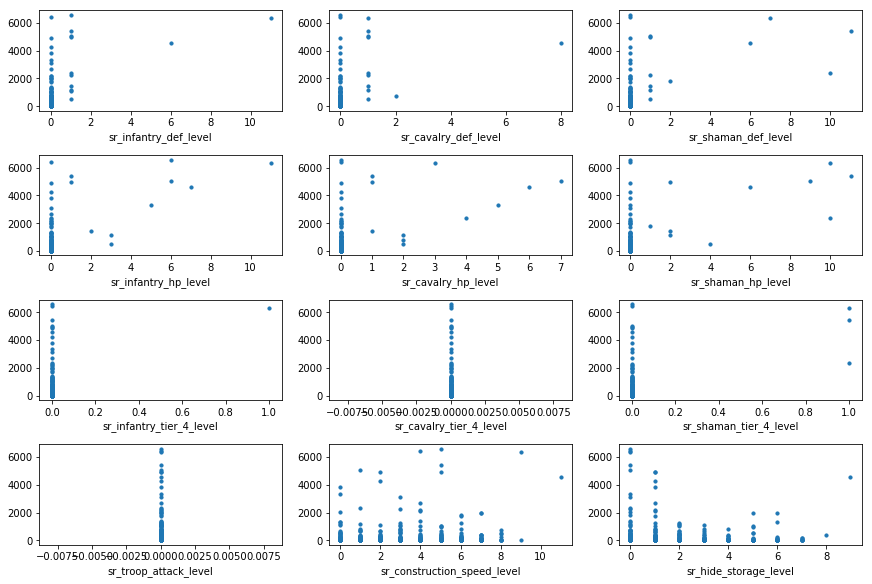

In [34]:
fig, axs = plt.subplots(4, 3, constrained_layout=True, figsize=(12, 8))
n = 62
for i in range(4):
    for j in range(3):
        axs[i, j].scatter(temp_data.iloc[ : , n], temp_data.iloc[ : , -1], s=10)
        axs[i, j].set_xlabel(temp_data.iloc[ : , n].name)
        n += 1
plt.savefig('scatter6.png', dpi=100)

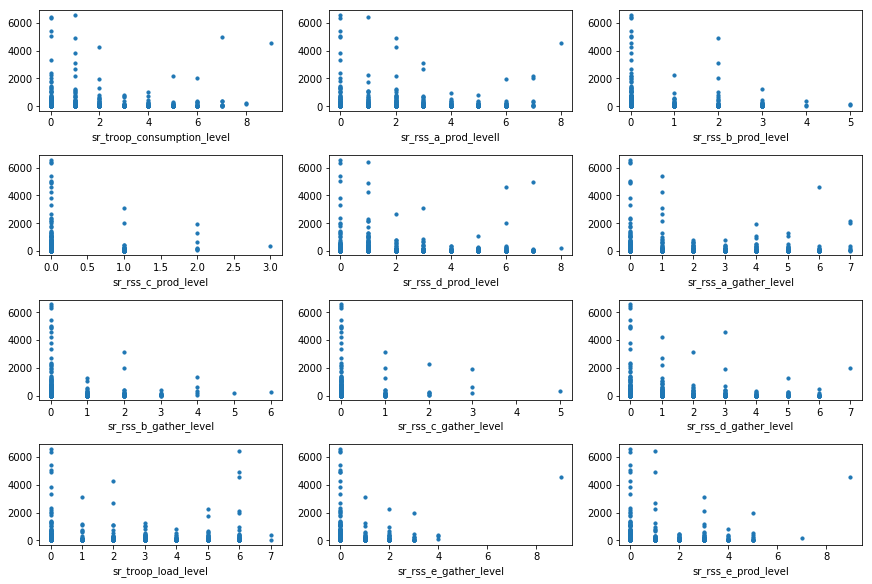

In [35]:
fig, axs = plt.subplots(4, 3, constrained_layout=True, figsize=(12, 8))
n = 74
for i in range(4):
    for j in range(3):
        axs[i, j].scatter(temp_data.iloc[ : , n], temp_data.iloc[ : , -1], s=10)
        axs[i, j].set_xlabel(temp_data.iloc[ : , n].name)
        n += 1
plt.savefig('scatter7.png', dpi=100)

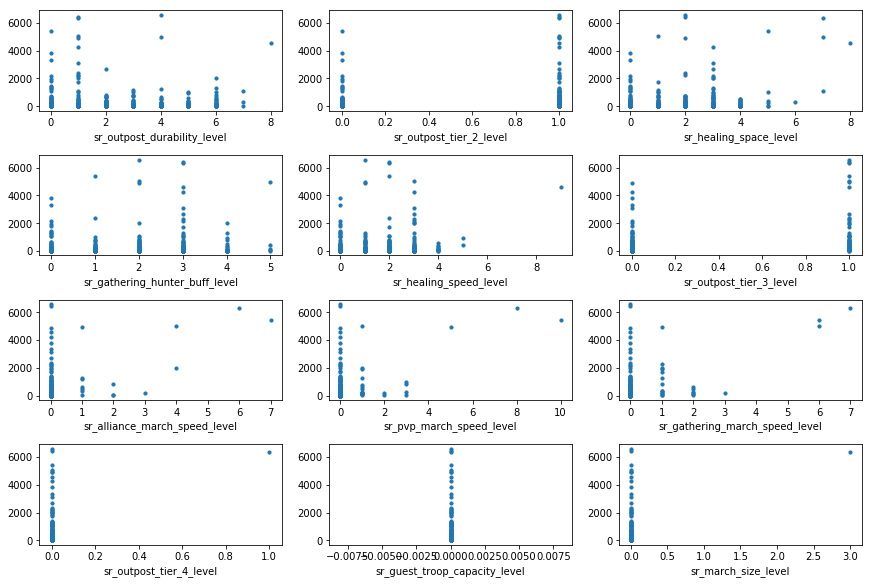

In [36]:
fig, axs = plt.subplots(4, 3, constrained_layout=True, figsize=(12, 8))
n = 86
for i in range(4):
    for j in range(3):
        axs[i, j].scatter(temp_data.iloc[ : , n], temp_data.iloc[ : , -1], s=10)
        axs[i, j].set_xlabel(temp_data.iloc[ : , n].name)
        n += 1
plt.savefig('scatter8.png', dpi=100)

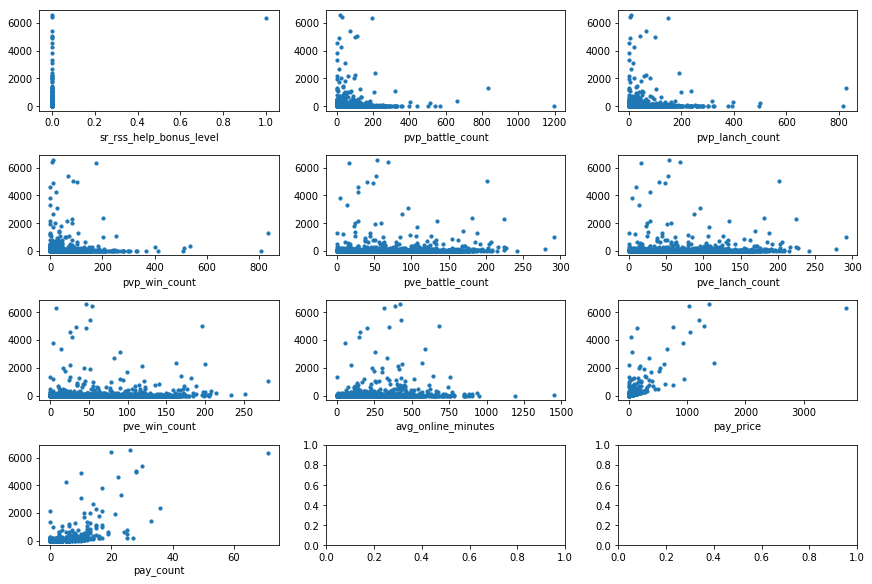

In [40]:
fig, axs = plt.subplots(4, 3, constrained_layout=True, figsize=(12, 8))
n = 98
for i in range(4):
    for j in range(3):
            if n ==108:
                break
            axs[i, j].scatter(temp_data.iloc[ : , n], temp_data.iloc[ : , -1], s=10)
            axs[i, j].set_xlabel(temp_data.iloc[ : , n].name)
            n += 1
plt.savefig('scatter9.png', dpi=100)

从原数据中各个变量与45天预测付费金额的散点图来看，除了7天内的付费金额与付费次数外，其他自变量与45天预测付费金额都没有明显的线性关系，其中7天内的付费金额与付费次数与45天预测付费金额大致呈正相关的关系。

In [ ]:
pd.to_csv